In [1]:
# Import required libraries
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import hvplot.pandas
from pathlib import Path
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import balanced_accuracy_score
from imblearn.metrics import classification_report_imbalanced

c:\Users\afias\anaconda3\envs\dev\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
# Read nyc data
nyc_df = pd.read_csv(Path('../Data Cleaning/encoded_data.csv'), index_col=0)

# Display sample data
nyc_df.head()

,trip_length_miles,trip_time_seconds,base_passenger_fare_dollars,tolls_dollars,black_car_fund_dollars,sales_tax_dollars,congestion_surcharge_dollars,airport_fee_dollars,tip_dollars,driver_pay_dollars,...,pickup_borough_Bronx,pickup_borough_Brooklyn,pickup_borough_Manhattan,pickup_borough_Queens,pickup_borough_Staten Island,dropoff_borough_Bronx,dropoff_borough_Brooklyn,dropoff_borough_Manhattan,dropoff_borough_Queens,dropoff_borough_Staten Island
0,2.06,660,23.87,0.0,0.72,2.12,0.00,0.0,0.0,14.02,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,4.38,1379,41.66,0.0,1.25,3.70,0.00,0.0,0.0,33.24,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1.39,590,34.03,0.0,1.02,3.02,2.75,0.0,0.0,45.18,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1.24,461,35.71,0.0,1.07,3.17,0.00,0.0,0.0,31.67,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,2.76,1029,27.69,0.0,0.83,2.46,0.00,0.0,0.0,22.54,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [3]:
nyc_df ['tip_or_no_tip']= np.where(nyc_df['tip_or_no_tip'] > 0, 1, 0)

In [4]:
# Split the data into X (features) and y (target)
X = nyc_df.drop(columns=['tip_or_no_tip'])

# X variable all features except the target
y = nyc_df['tip_or_no_tip']

In [5]:
# Split into testing and training sets using train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

In [6]:
# Print Shape of training and testing sets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(9000, 664)
(9000,)
(3000, 664)
(3000,)


In [7]:
# Scale the data
scaler = StandardScaler()
X_scaler = scaler.fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [8]:
# Check value count
nyc_df['tip_or_no_tip'].value_counts()

tip_or_no_tip
0    9617
1    2383
Name: count, dtype: int64

## Fit two versions of a random forest model to the data: a regular `RandomForest` classifier, and a `BalancedRandomForest` classifier.

In [9]:
from sklearn.ensemble import RandomForestClassifier

# Create a random forest classifier
rf_model = RandomForestClassifier(n_estimators=170, random_state=42)

# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

# Making predictions using the testing data
rf_predictions = rf_model.predict(X_test_scaled)

In [10]:
# Import BalancedRandomForestClassifier from imblearn
from imblearn.ensemble import BalancedRandomForestClassifier

# Instantiate a BalancedRandomForestClassifier instance
brf = BalancedRandomForestClassifier()

# Fit the model to the training data
brf.fit(X_train_scaled, y_train)

BalancedRandomForestClassifier()

In [11]:
# Predict labels for testing features
brf_predictions = brf.predict(X_test_scaled)

## Print confusion matrix, accuracy score, and classification report for each of the models.

In [12]:
# Confusion matrix for RandomForest on the original data
confusion_matrix(y_test, rf_predictions)

array([[2404,    0],
       [   1,  595]], dtype=int64)

In [13]:
# Accuracy score for the original data
baso = balanced_accuracy_score(y_test, rf_predictions)
print(baso)

0.9991610738255033


In [14]:
# Classification report for the original data
print(classification_report_imbalanced(y_test, rf_predictions))

                   pre       rec       spe        f1       geo       iba       sup

          0       1.00      1.00      1.00      1.00      1.00      1.00      2404
          1       1.00      1.00      1.00      1.00      1.00      1.00       596

avg / total       1.00      1.00      1.00      1.00      1.00      1.00      3000



In [15]:
# Import roc_auc curve to help distinguish between classes
from sklearn.metrics import roc_curve, auc

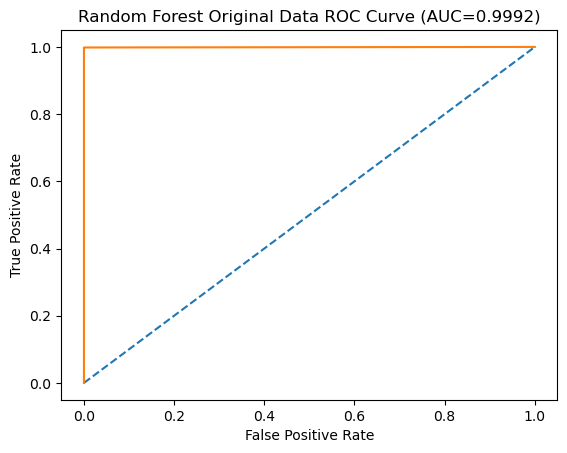

<Figure size 640x480 with 0 Axes>

In [16]:
# Plot ROC_Curve for RandomForest
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, rf_predictions)
auc_test = auc(fpr_test, tpr_test)
auc_test = round(auc_test, 4)
plt.plot([0,1], [0,1], '--')
plt.plot(fpr_test,tpr_test)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'Random Forest Original Data ROC Curve (AUC={auc_test})')
plt.show()
plt.savefig('../Images/RF_ROC')

In [17]:
# Confusion matrix for balanced random forest data
confusion_matrix(y_test, brf_predictions)

array([[2404,    0],
       [   1,  595]], dtype=int64)

In [18]:
# Accuracy score for the balanced random forest data
basr = balanced_accuracy_score(y_test, brf_predictions)
print(basr)

0.9991610738255033


In [19]:
# Print the classification report for the resampled data
print(classification_report_imbalanced(y_test, brf_predictions))

                   pre       rec       spe        f1       geo       iba       sup

          0       1.00      1.00      1.00      1.00      1.00      1.00      2404
          1       1.00      1.00      1.00      1.00      1.00      1.00       596

avg / total       1.00      1.00      1.00      1.00      1.00      1.00      3000



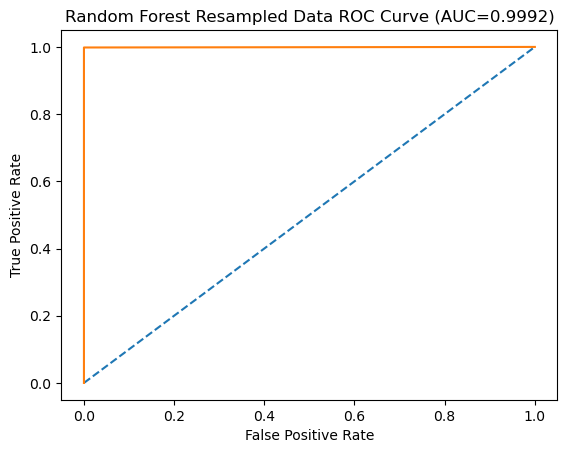

<Figure size 640x480 with 0 Axes>

In [20]:
# Plot ROC_Curve for RandomForest
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, brf_predictions)
auc_test = auc(fpr_test, tpr_test)
auc_test = round(auc_test, 4)
plt.plot([0,1], [0,1], '--')
plt.plot(fpr_test,tpr_test)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'Random Forest Resampled Data ROC Curve (AUC={auc_test})')
plt.show()
plt.savefig('../Images/RFRe_ROC')

## Resample by implementing a method for imbalanced data, using `SMOTEENN`. Re-esimate by `RandomForest`.

In [21]:
# Import SMOTE from imblearn
from imblearn.combine import SMOTEENN

In [22]:
# Instantiate the SMOTEENN model instance
sn_sampler = SMOTEENN(random_state=69, sampling_strategy='all')

# Fit the SMOTE model to the training data
X_resampled, y_resampled = sn_sampler.fit_resample(X_train, y_train)

# Fit the RandomForestClassifier on the resampled data
model_resampled_rf = RandomForestClassifier()
model_resampled_rf.fit(X_resampled, y_resampled)

# Generate predictions based on the resampled data model
rf_resampled_predictions = model_resampled_rf.predict(X_test)

In [23]:
# Confusion matrix for SMOTEENN data
confusion_matrix(y_test, rf_resampled_predictions)

array([[2404,    0],
       [   7,  589]], dtype=int64)

In [24]:
# Accuracy score for the SMOTEENN data
basrs = balanced_accuracy_score(y_test, rf_resampled_predictions)
print(basrs)

0.9941275167785235


In [25]:
# Print the classification report for the SMOTEENN data
print(classification_report_imbalanced(y_test, rf_resampled_predictions))

                   pre       rec       spe        f1       geo       iba       sup

          0       1.00      1.00      0.99      1.00      0.99      0.99      2404
          1       1.00      0.99      1.00      0.99      0.99      0.99       596

avg / total       1.00      1.00      0.99      1.00      0.99      0.99      3000



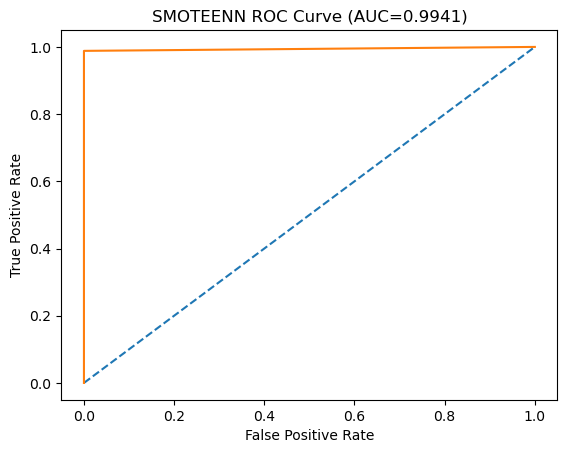

<Figure size 640x480 with 0 Axes>

In [26]:
# Plot ROC_Curve for SMOTEENN
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, rf_resampled_predictions)
auc_test = auc(fpr_test, tpr_test)
auc_test = round(auc_test, 4)
plt.plot([0,1], [0,1], '--')
plt.plot(fpr_test,tpr_test)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'SMOTEENN ROC Curve (AUC={auc_test})')
plt.show()
plt.savefig('../Images/SMOTEENN_ROC')

Based on the Balanced RandomForest and SMOTEENN which balanced out the datasets, it can be concluded that Balanced RandomForest did a better job with an accuracy score of 99.91% , Precision and Recall of 100% , and an roc_auc of 99.92% whereas SMOTEENN scored an accuracy of 99.41%, Precision 100% and Recall of 99% , and roc_curve of 99.41%. To determine which produced the best results, the confusion matrix was analyzed. Balanced RandomForest had TP of 2404 , FP of 0, FN of 1 and TN of 595 ; SMOTEENN produced a TP of 2404 , FP of 0, FN of 7, and TN of 589. It would be best to use the Balanced RandomForest as a benchmark to assess the behavior of extra tipping for drivers due it the models nature of training and learning the dataset to produce 1 false negative. 

## Evaluate new ML, Using Deep Learning (Neural Network)

In [74]:
# Import a new classifier from SKLearn, Multi-Layer Preceptron Classifier
from sklearn.neural_network import MLPClassifier

# Initiate the model instance
model = MLPClassifier(
    solver='sgd',
    alpha=1e-5,
    max_iter=1200,
    hidden_layer_sizes=(25,12),
    random_state=42
)

In [75]:
# Fit the model using the training data
model = model.fit(X_train_scaled, y_train)

# Use the testing dataset to generate the predictions for the new model
pred = model.predict(X_test_scaled)

# Review the model's predicted values
pred[:10]

array([0, 1, 0, 1, 0, 1, 0, 0, 0, 0])

In [76]:
# Use a classification report to evaluate the model using the predictions and testing data
mlpc_testing_report = classification_report(y_test, pred)

# Print the classification report
print(mlpc_testing_report)

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      2404
           1       0.93      0.84      0.88       596

    accuracy                           0.96      3000
   macro avg       0.95      0.91      0.93      3000
weighted avg       0.96      0.96      0.96      3000



In [77]:
# Confusion matrix for MlPC data
confusion_matrix(y_test, pred)

array([[2369,   35],
       [  97,  499]], dtype=int64)

In [78]:
# Create a new empty predictions DataFrame:

# Create a predictions DataFrame
mlpc_predictions_df = pd.DataFrame(index = X_test.index)

# Add the SVM model predictions to the DataFrame
mlpc_predictions_df['Predicted'] = pred

# Add the actual returns to the DataFrame
mlpc_predictions_df['tip_or_no_tip'] = nyc_df['tip_or_no_tip']

# Add the strategy returns to the DataFrame
mlpc_predictions_df['ml_tip_noTip'] = (mlpc_predictions_df['tip_or_no_tip'] * mlpc_predictions_df['Predicted'])

# Review the DataFrame
display(mlpc_predictions_df.head())
display(mlpc_predictions_df.tail())

,Predicted,tip_or_no_tip,ml_tip_noTip
8781,0,0,0
7756,1,0,0
10175,0,0,0
10655,1,1,1
9546,0,0,0


,Predicted,tip_or_no_tip,ml_tip_noTip
9643,0,0,0
4255,0,0,0
8170,0,0,0
9860,0,0,0
1121,0,0,0


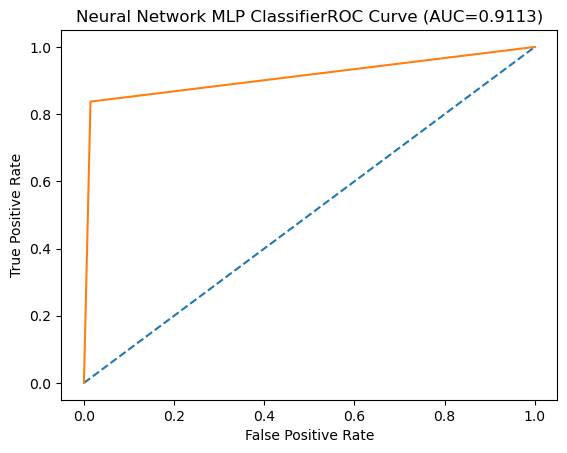

<Figure size 640x480 with 0 Axes>

In [79]:
# Plot ROC_Curve for RandomForest
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, pred)
auc_test = auc(fpr_test, tpr_test)
auc_test = round(auc_test, 4)
plt.plot([0,1], [0,1], '--')
plt.plot(fpr_test,tpr_test)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'Neural Network MLP ClassifierROC Curve (AUC={auc_test})')
plt.show()
plt.savefig('../Images/MPC_ROC')